## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_movies.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
df_shows.head(15)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [5]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
df_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Объединять датасеты будем по столбцу `puNumber`. Заметим, что в датасете df_movies столбец `puNumber` помимо чисел содержит слово "нет". Заменим "нет" на 0, поменяем тип данных. Затем объединим данные в один датафрейм.

In [7]:
df_movies['puNumber'] = df_movies['puNumber'].replace('нет', '0')
df_movies['puNumber'] = df_movies['puNumber'].astype('int')
df_full = df_movies.merge(df_shows, on='puNumber', how='left')
df_full.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Можно заметить, что количество значений в столбце `box_office` в датафреймах df_shows и df_full совпадает и равно 3158. Значит, при объединении датафреймов данные не пропали.

In [9]:
df_full.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


В получившемся датафрейме 16 столбцов:
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `budget` — общий бюджет фильма;
* `financing_source` — источник государственного финансирования;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

**Вывод**

В данных видны следующие проблемы:
1. Верблюжий регистр в названии столбца `puNumber`;
2. В столбце `puNumber` были как числа, так и слово "нет". "Нет" заменили нулём.
2. Пропуски в столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres`, `box_office`. Пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` говорят о том, что фильм не получал государственную поддержку;
3. Тип данных в столбце `show_start_date` — object, а не datetime;
4. Тип данных в столбце `ratings` — object, а не float.

Для дальнейшей работы нам понадобятся столбцы `show_start_date`, `director`, `genres`, `budget`, `refundable_support`, `nonrefundable_support`, `box_office`, `age_restriction`, `production_country`, `ratings`. Надо устранить проблемы в этих столбцах, если они есть.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Сначала переименуем столбец `puNumber`.

In [10]:
df_full = df_full.rename(columns={'puNumber': 'pu_number'})

Теперь изменим тип данных в столбце `show_start_date` на datetime.

In [11]:
df_full['show_start_date'] = pd.to_datetime(df_full['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Изучим данные в столбце ratings. Для этого выведем уникальные значения.

In [12]:
df_full['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Рейтинг записан как в виде десятичных дробей, так и в виде процентов. Приведём все значения к виду десятичных дробей. Для этого сначала удалим "%", потом изменим тип данных на float и разделим все значения больше 10 на 10.

In [13]:
df_full['ratings'] = df_full['ratings'].str.strip('%').astype('float')
df_full.loc[df_full['ratings'] > 10,'ratings'] = df_full['ratings'] / 10

#### Шаг 2.2. Изучение пропусков в датафрейме

Узнаем, в каких столбцах есть пропуски и в каком количестве.

In [14]:
df_full.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Заменим пропуски в столбцах `film_studio`, `production_country`, `director`, `producer`, `genres` на "unknown". Мы не можем предложить адекватную замену пропускам в других столбцах, поэтому их заполнять не будем.

In [15]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'genres']:
    df_full[column] = df_full[column].fillna('unknown')

#### Шаг 2.3. Изучение дубликатов в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [16]:
df_full.duplicated().sum()

0

In [17]:
df_full[df_full['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [18]:
df_full.query('pu_number in [221154310, 221054410]')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [19]:
df_full[df_full['title'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Полных дубликатов в данных нет, но есть фильмы, которые выходили в прокат несколько раз. Также есть фильмы с совпадающими номерами прокатного удостоверения. Удалять фильмы с совпадающими номерами прокатного удостоверения не будем, т.к. это не полные дубликаты. Возможно, правила выдачи прокатного удостоверения допускали совпадение номеров, а если нет — мы не знаем, какой из фильмов стоит оставить.

#### Шаг 2.4. Изучение категориальных значений

In [20]:
for column in ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres']:
    print(df_full[column].unique())

['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобрит

Во многих столбцах есть проблемы с пробелами. Где-то стоят лишние пробелы перед словом или после него (например: ' Анимационный'), где-то их наоборот не хватает (например, есть 'США-Германия' и 'США - Германия'). Также одно и то же название или имя встречается в разном написании (например, "ХЭрольд Рэмис" и "Гарольд Реймис"), а элементы списков отделены разными знаками — запятыми и тире. 

Удалим лишние пробелы в столбце type.

In [21]:
df_full['type'] = df_full['type'].str.strip()

#### Шаг 2.5. Проверка количественных значений

In [22]:
df_full.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.488173,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114638,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


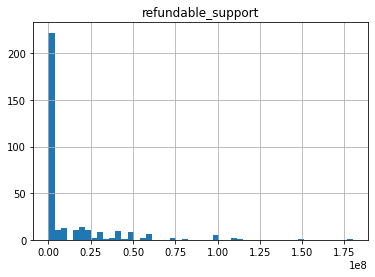

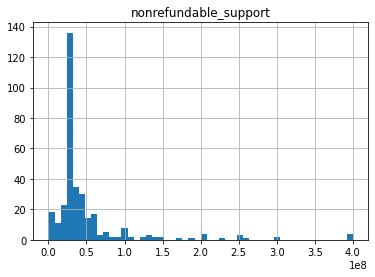

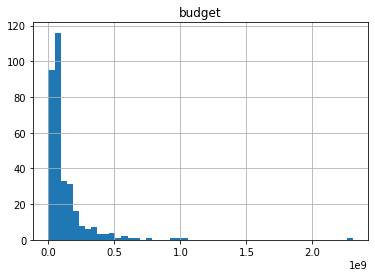

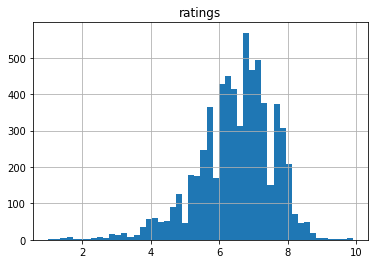

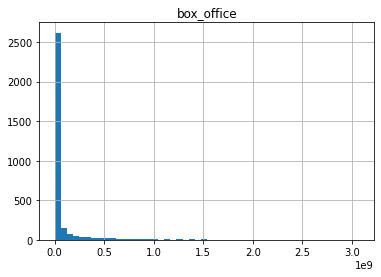

In [23]:
for column in ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']:
    df_full.hist(column, bins=50)

Государство редко выделяет возвратные средства, поэтому мы видим пик около нуля. Хоть ненулевых значений и мало, ориентируясь на гистограмму, можно отнести значения больше 25 миллионов к аномально большим.

Объём невозвратных средств государственной поддержки обычно составляет 20-50 миллионов, но есть и аномально большие значения вплоть до 400 миллионов.

Чаще всего бюджет фильма составляет до 200 миллионов, пик приходится примерно на 100 миллионов, но крайне редко встречаются сильно выбивающиеся значения: миллиард и даже больше 2 миллиардов.

Большинство фильмов имеют рейтинг в диапазоне от 5 до 8. Есть и "уникальные" фильмы с рейтингом меньше 3 и больше 9, в частности фильмы с рейтингом 1 и 9.9.

На графике с суммой сборов в рублях виден пик в районе 0, 25% фильмов собрали до 80 тысяч. Отличных от "околонулевых" значений мало, но можно заметить, что после 500 миллионов график превращается в еле-еле заметный "хвост".

Стобец `budget` включает в себя полный объём государственной поддержки. Проверим, нет ли строк, в которых общий бюджет фильма меньше выделенных государством средств.

In [24]:
df_full.query('budget < refundable_support + nonrefundable_support')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Нашлось 17 фильмов с нулевым бюджетом, получивших государственную поддержку. Удалим их. Также удалим строку с фильмом без номера прокатного удостоверения. 

In [25]:
df_full = df_full.query('budget != 0 and pu_number != 0')

#### Шаг 2.6. Добавление новых столбцов





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [26]:
df_full['year'] = pd.DatetimeIndex(df_full['show_start_date']).year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [27]:
def first(row):
    for words in row:
        return(row.split(',')[0])
    
df_full['main_director'] = df_full['director'].apply(first)
df_full['main_genre'] = df_full['genres'].apply(first)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [28]:
df_full['support_to_budget'] = (df_full['refundable_support'] + df_full['nonrefundable_support']) / df_full['budget']

**Вывод**

Итак, мы изменили название столбца `puNumber` на `pu_number` и типы данных в столбцах `show_start_date` и `ratings` на datetime и float соответственно. 

В столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres`, `box_office` были обнаружены пропуски. Пропущенные значения в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` говорят о том, что фильм не получал государственную поддержку. Пропускам в столбцах `ratings` и `box_office` мы не можем предложить адекватную замену, поэтому заполнять их не стали. А вот пропуски в остальных столбцах мы заменили на "unknown". 

Полных дубликатов в данных мы не обнаружили, но узнали, что некоторые фильмы выходили в прокат несколько раз. Также были найдены дубликаты в столбце `pu_number`. Эти фильмы выходили в прокат в один день, также они относятся к одним жанрам. "Анализируй это!" и "Анализируй то!", возможно, один и тот же фильм или серия фильмов, и, возможно, именно поэтому у них совпадает номер прокатного удостоверения. С фильмами "Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле" сложнее: это явно не один фильм под разными названиями и не серия фильмов. В этом случае, возможно, один номер прокатного удостоверения был присвоен по ошибке или из-за того, что права на показ фильмов были у одной организации и дата выхода в прокат совпадает.

В столбце `type` были обнаружены лишние пробелы, а в столбце `budget` — нули при ненулевой государственной поддержке. Лишние пробелы, как и фильмы с нулевым бюджетом были удалены.

Помимио лишних пробелов в столбцах с категориальными значениями встречается несколько вариантов написания одного и того же слова, в т.ч. есть и опечатки, и разные символы, разделяющие элементы списка.

Также мы удалили фильм без прокатного удостоверения и добавили столбцы с информацией о годе проката (`year`), именем и фамилией главного режиссёра (`main_director`), основным жанром (`main_genre`) и долей государственной поддержки от общего бюджета фильма (`support_to_budget`).

### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Посмотрим, сколько фильмов выходило в прокат каждый год.

In [29]:
df = df_full.pivot_table(index='year', values='pu_number', aggfunc='count')
df = df.rename(columns={'pu_number':'number_of_films'})
df

,number_of_films
year,
2010,985
2011,622
2012,593
2013,630
2014,805
2015,699
2016,815
2017,503
2018,887


<AxesSubplot:xlabel='year'>

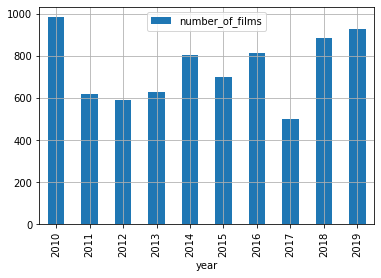

In [30]:
df.plot(kind='bar', grid=True)

Больше всего фильмов выходило в прокат в 2010 и 2019 годах — 985 и 929 фильмов соответственно, а меньше всего — в 2017 (503 фильма) и 2012 (593 фильма).

Теперь посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах, предварительно убрав фильмы с нулевыми кассовыми сборами.

In [31]:
df['box_office'] = df_full.query('box_office != 0').pivot_table(index='year', values='box_office', aggfunc='count')
df = df.rename(columns={'box_office':'films_with_box_office'})
df['share'] = df['films_with_box_office'] / df['number_of_films']
df

,number_of_films,films_with_box_office,share
year,,,
2010,985,101,0.102538
2011,622,109,0.175241
2012,593,123,0.207420
2013,630,179,0.284127
2014,805,272,0.337888
2015,699,456,0.652361
2016,815,522,0.640491
2017,503,355,0.705765
2018,887,471,0.531003


<AxesSubplot:xlabel='year'>

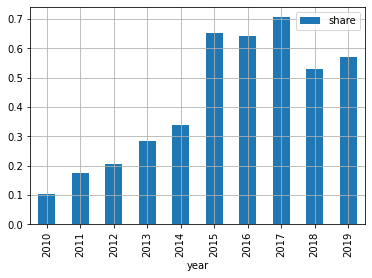

In [32]:
df.plot(y='share', kind='bar', grid=True)

С 2010 по 2015 год и с 2018 по 2019 доля фильмов с указанными данными о прокате в кинотеатрах растёт, причём в 2015 году фильмов намного больше, чем в 2014. Наибольшая доля приходится на 2017 год, а в 2018 году наблюдается спад. Полнее всего в данных представлен период с 2015 года по 2019.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [33]:
df_box_office = df_full.pivot_table(index='year', values='box_office', aggfunc='sum')
df_box_office

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.434718e+09
2015,3.852783e+10
2016,4.674232e+10
2017,4.845815e+10
2018,4.925199e+10


<AxesSubplot:xlabel='year'>

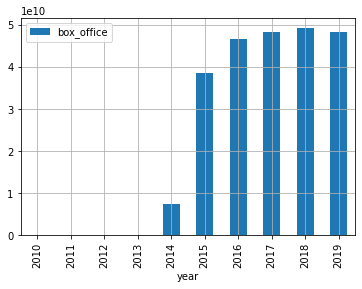

In [34]:
df_box_office.plot(kind='bar', grid=True)

<AxesSubplot:xlabel='year'>

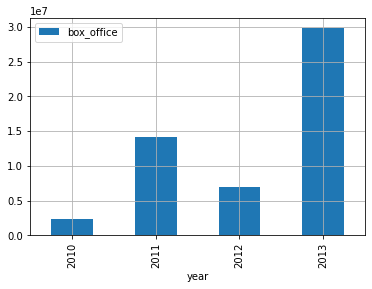

In [35]:
df_box_office.query('year < 2014').plot(kind='bar', grid=True)

С каждым годом, не считая 2012 и 2019, сумма сборов увеличивается. В 2012 и 2019 наблюдается небольшой спад по сравнению с предыдущим годом. Минимальная сумма сборов была в 2010 году (2.4 миллиона), а максимальная — в 2018 году (49 миллиардов).

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [36]:
df_full.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.00
2011,1.293832e+05,3000.00
2012,5.433924e+04,5660.00
2013,1.619549e+05,3522.50
2014,2.674359e+07,18137.50
2015,8.393862e+07,4784781.50
2016,8.937345e+07,3776087.56
2017,1.365018e+08,9919415.00


Медианная сумма сборов меньше средней. Это говорит о том, что в каждом году были фильмы, собравшие в прокате больше остальных. Максимальная медианная и средняя сумма сборов была в 2017 году, а минимальные значения — в 2010 году. Эти данные немного отличаются от общей суммы сборов: максимальная сумма сборов была в 2018 году, а минимальная также в 2010.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

<AxesSubplot:xlabel='year'>

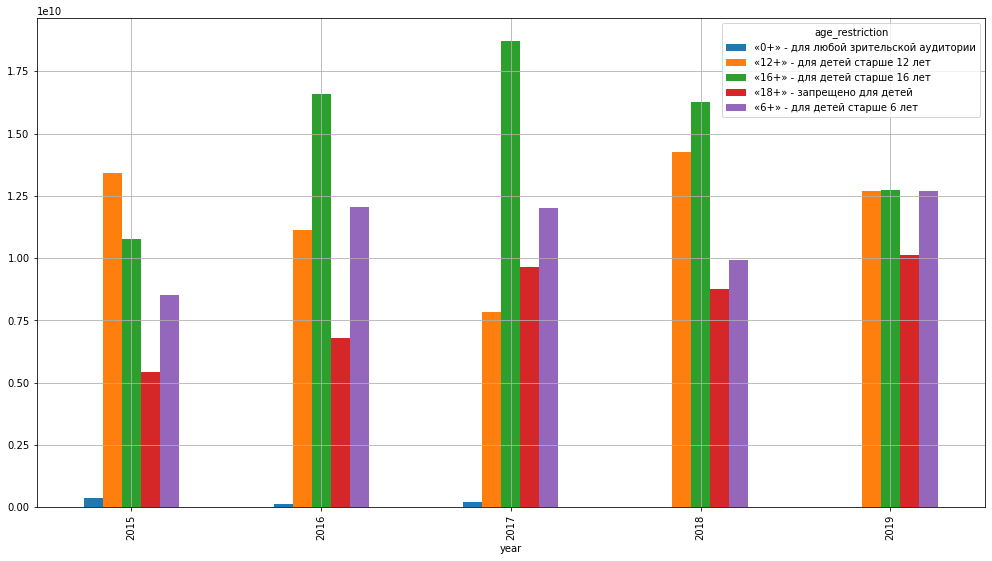

In [37]:
(df_full.query('year > 2014')
     .pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
     .plot(kind='bar', grid=True, figsize=(17,9))
)

In [38]:
(df_full.query('age_restriction == "«12+» - для детей старше 12 лет" and year == 2015 and box_office > 0')
     .sort_values(by='box_office', ascending=False)
     .head(5)
)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
3117,Звёздные войны: Пробуждение силы,121024915,2015-12-11 12:00:00,Художественный,"Лукасфилм, Бэд Робот, Трунорт Продакшнз",США,Джей Джей Абрамс,"Джей Джей Абрамс, Брайан Берк, Кэтлин Кеннеди",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"фантастика,боевик,приключения",1.658861e+09,2015,Джей Джей Абрамс,фантастика,NaN
2159,Мстители: Эра Альтрона,121007215,2015-04-03 12:00:00,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,"фантастика,боевик,приключения",1.500989e+09,2015,Джосс Уидон,фантастика,NaN
2579,Мир Юрского периода,121006515,2015-04-03 12:00:00,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,"фантастика,приключения,боевик",1.211159e+09,2015,Колин Треворроу,фантастика,NaN
2509,Терминатор: Генезис,121012415,2015-06-11 12:00:00,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.4,"фантастика,боевик,триллер",1.060054e+09,2015,Алан Тэйлор,фантастика,NaN
2599,Эверест (2015),121012815,2015-06-23 12:00:00,Художественный,"Кросс Крик Пикчерз, Фри Стейт Пикчерз, Эр Вэ К...",США,Бальтазар Кормакур,"Ники Кентиш Барнс, Тим Беван, Лиза Чейсин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,"боевик,триллер,драма",6.305506e+08,2015,Бальтазар Кормакур,боевик,NaN


In [39]:
(df_full.query('age_restriction == "«16+» - для детей старше 16 лет" and year == 2015 and box_office > 0')
     .sort_values(by='box_office', ascending=False)
     .head(5)
)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
2105,Форсаж 7,121001215,2015-01-27 12:00:00,Художественный,"Юниверсал Пикчерз, Релятивити Медиа, Дентсу, Ф...",США,Джеймс Ван,"Вин Дизель, Майкл Фоттрел",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"боевик,триллер,приключения",1.486131e+09,2015,Джеймс Ван,боевик,NaN
2559,007: Спектр,121021715,2015-10-27 12:00:00,Художественный,"Би 24, Коламбиа Пикчерз, Данджак, Эон Продакшн...",США - Великобритания,Сэм Мендес,"Барбара Брокколи, Майкл Дж.Уилсон",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"боевик,триллер,приключения",7.672746e+08,2015,Сэм Мендес,боевик,NaN
2701,Самый Лучший День,111017815,2015-10-14 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,29000000.0,34000000.0,130619336.0,Фонд кино,4.7,"комедия,музыка",6.830291e+08,2015,А.Першин (псевдоним Ж.Крыжовников),комедия,0.482318
2824,Голодные игры: Сойка-пересмешница. Часть 2,121022415,2015-11-12 12:00:00,Художественный,"Колор Форс, ЛайонсГейт, Студио Бабельсберг",США,Френсис Лоуренс,"Нина Джейкобсон, Джон Килик",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"фантастика,боевик,триллер",6.666535e+08,2015,Френсис Лоуренс,фантастика,NaN
2561,Безумный Макс: Дорога ярости,121009615,2015-04-27 12:00:00,Художественный,"Кеннеди Миллер Продакшнз, Виллидж Роадшоу Пикч...",США - Австралия,Джордж Миллер,"Джордж Миллер, Дуг Митчел",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"боевик,фантастика,приключения",6.501660e+08,2015,Джордж Миллер,боевик,NaN


In [40]:
(df_full.query('age_restriction == "«16+» - для детей старше 16 лет" and year == 2019 and box_office > 0')
     .sort_values(by='box_office', ascending=False)
     .head(5)
)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
6820,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2.576614e+09,2019,Джо Руссо,фантастика,NaN
6728,Капитан Марвел,121002119,2019-03-07 12:00:00,Художественный,Марвел Студиос,США,"Анна Боден, Райан Флек",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"фантастика,боевик,приключения",1.144426e+09,2019,Анна Боден,фантастика,NaN
6684,Алита: Боевой ангел,121000619,2019-02-07 12:00:00,Художественный,"ХХ Век Фокс, Лайгсторм Интертейнмент, Трублеме...",США - Канада - Аргентина,Роберт Родригес,"Дэвид Валдес, Джеймс Кэмерон, Джон Ландау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"фантастика,боевик,приключения",7.578647e+08,2019,Роберт Родригес,фантастика,NaN
6583,Стекло,121030318,2019-01-17 12:00:00,Художественный,"Блайндинг Эйдж Пикчерз, Блюмхаус Продакшнз",США,"М,Найт Шьямалан","Джейсон Блюм, Марк Бьенсток, Эшвин Раджан, М.Н...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"фантастика,триллер,драма",6.431212e+08,2019,М,фантастика,NaN
6545,Зеленая книга,121029418,2019-01-10 12:00:00,Художественный,"Партисипант Медиа, ДримВоркс, Амблин Партнерс,...",США,Питер Фаррелли,"Джим Бёрк, Брайан Хэйес Карри, Питер Фаррелли",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.3,"комедия,драма,биография",5.732257e+08,2019,Питер Фаррелли,комедия,NaN


In [41]:
(df_full.query('age_restriction == "«12+» - для детей старше 12 лет" and year == 2019 and box_office > 0')
     .sort_values(by='box_office', ascending=False)
     .head(5)
)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
7456,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,0.375
7057,Человек-Паук: Вдали от дома,121018019,2019-07-04 12:00:00,Художественный,"Коламбиа Пикчерз, Марвел Студиос, Паскаль Пикчерз",США,Джон Уоттс,"Эми Паскаль, Кевин Фейги",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,"фантастика,боевик,приключения",1.203696e+09,2019,Джон Уоттс,фантастика,NaN
7418,Джуманджи: Новый уровень,121034919,2019-12-06 12:00:00,Художественный,"Хартбит Продакшнз, Мэтт Толмак Продакшнз, Севе...",США,Джейк Кэздан,"Дэни Гарсия, Хирам Гарсия, Дуэйн Джонсон, Джей...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"фэнтези,боевик,комедия",1.120026e+09,2019,Джейк Кэздан,фэнтези,NaN
7110,Форсаж: Хоббс и Шоу,121021319,2019-08-01 12:00:00,Художественный,Юниверсал Пикчерз,Великобритания - США,Дэвид Литч,"Хирам Гарсиа, Дуэйн Джонсон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.3,"боевик,триллер,приключения",1.065210e+09,2019,Дэвид Литч,боевик,NaN
7388,Полицейский с Рублевки. Новогодний Беспредел 2,111019519,2019-12-12 12:00:00,Художественный,"АО ""ТНТ-Телесеть"", ООО ""ЛЕГИО ФЕЛИКС"", ООО ""1-...",Россия,И.Куликов,"В.Федорович, Е.Никишов, И.Куликов, ООО ""1-2-3 ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"комедия,приключения",1.039706e+09,2019,И.Куликов,комедия,NaN


In [42]:
(df_full.query('age_restriction == "«6+» - для детей старше 6 лет" and year == 2019 and box_office > 0')
     .sort_values(by='box_office', ascending=False)
     .head(5)
)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
7216,Малефисента: Владычица тьмы,121026219,2019-10-04 12:00:00,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"фэнтези,приключения,семейный",1.911945e+09,2019,Йоаким Роннинг,фэнтези,NaN
7383,Холодное сердце II,124009619,2019-11-23 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерс",США,"Крис Бак, Дженнифер Ли",Питер Дел Вечо,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.1,"мультфильм,мюзикл,фэнтези",1.827245e+09,2019,Крис Бак,мультфильм,NaN
6715,Как приручить дракона 3,124000719,2019-02-21 12:00:00,Анимационный,"ДримУоркс Анимейшн, Мэд Хаттер Интертейнмент",США,Дин ДеБлуа,"Бонни Арнольд, Брэд Льюис",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"мультфильм,фэнтези,боевик",1.689541e+09,2019,Дин ДеБлуа,мультфильм,NaN
6957,Тайная жизнь домашних животных 2,124003519,2019-05-25 12:00:00,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз","США, Франция, Япония",Крис Рено,Лиз-Мари Амар,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.8,"мультфильм,комедия,приключения",1.478921e+09,2019,Крис Рено,мультфильм,NaN
7273,Эверест,124008119,2019-10-03 12:00:00,Анимационный,"Дрим Воркс Анимэйшн, Перл Студио",США - КНР,"Тодд Вилдерман, Джилл Калтон",Сюзанн Бёрги,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.2,"боевик,триллер,драма",6.894839e+08,2019,Тодд Вилдерман,боевик,NaN


В 2015 году больше всего денег в прокате собрали фильмы с возрастным ограничением "12+". В 2016-2018 с большим отрывом "победили" фильмы с возрастным ограничением "16+". В 2019 году фильмы с ограничением "16+" также были самыми популярными, но фильмы "12+" и "6+" отстали несильно. У фильмов для любой зрительской аудитории сумма сборов оказалась самой маленькой.

Фильмы с возрастным ограничением "16+" более интересны для взрослых и подростков, поэтому их популярность объяснима. Но в 2015 году с возрастным ограничением "12+" в прокат выходили такие культовые фильмы как "Звёздные войны: Пробуждение силы", "Мстители: Эра Альтрона", "Мир Юрского периода", "Терминатор: Генезис". Именно из-за них фильмы "12+" собрали в прокате так много. Самые кассовые фильмы "16+" 2015 года были менее популярными.

В 2019 году ситуация была похожей: с возрастными ограничениями "6+", "12+" и "16+" выходили фильмы и мультфильмы высокого качетсва, которые понравились людям разных возрастов. Некоторые из них были продолженими популярных фильмов.

**Вывод**

Итак, больше всего фильмов вышло в 2010 и 2019 годах, а меньше всего — в 2017 и 2012. Но данные о прокате известны не для всех фильмов. Проанализировав изменение доли фильмов с указанной информацией о прокате  по годам, мы пришли к выводу, что полнее всего представлен период с 2015 по 2019 год.

С каждым годом сумма сборов увеличивается, лишь в 2012 и 2019 наблюдается небольшой спад. В 2010 году сумма сборов была минимальной, а в 2018 максимальной: 2.4 миллиона и 49 миллиардов соответственно. Медианная сума сборов оказалась меньше средней. Это говорит о том, что некоторые фильмы собирали в прокате намного больше остальных. 

Также мы выяснили, что возрастное ограничение влияет на сборы в прокате. В период с 2016 по 2019 год самыми прибыльными были фильмы "16+". В 2015 году больше остальных собрали фильмы "12+". Это связано с тем, что с таким возрастным ограничением в прокат вышли фильмы, полюбившиеся людям разных возрастов. В 2019 по тем же причинам фильмы с ограничениями "6+" и "12+" собрали примерно столько же, сколько и фильмы "16+".

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

In [43]:
films_with_sup = df_full.query('budget > 0').reset_index(drop=True)
films_with_sup

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_to_budget
0,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04,2014,А.Якимчук,unknown,0.700000
2,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
3,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
4,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
311,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
312,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
313,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


Сначала узнаем, какой рейтинг у фильмов, получивших государственную поддержку.

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

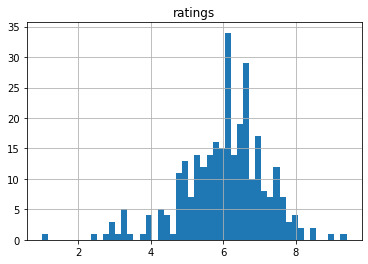

In [44]:
films_with_sup.hist('ratings', bins=50)

У большинства фильмов рейтинг 6-7, но также встречаются как плохие фильмы с рейтингом меньше 4, так и отличные фильмы с рейтингом выше 8.

Посмотрим, фильмы каких жанров чаще поддерживает государство.

<AxesSubplot:xlabel='main_genre'>

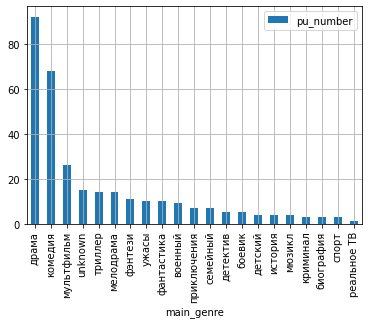

In [45]:
(films_with_sup.pivot_table(index='main_genre', values='pu_number', aggfunc='count')
 .sort_values(by='pu_number', ascending=False)
 .plot(kind='bar', grid=True)
)

Чаще всего государство выделяет средства на драмы и комедии (к этим жанрам относится половина всех фильмов), реже всего — на "реальное ТВ", "спорт", "биографию" и "криминал".

Теперь узнаем, какая часть фильмов, получивших государственную поддержку, окупилась. 

In [46]:
def payback (row):
    if row['budget'] > row['box_office']:
        return('не окупился')
    if row['box_office'] >= row['budget']:
        return('окупился')
    return('неизвестно')

films_with_sup['payback'] = films_with_sup.apply(payback, axis=1)

In [47]:
payback_films = films_with_sup.pivot_table(index='payback', values='pu_number', aggfunc='count')
payback_films

,pu_number
payback,
не окупился,235
неизвестно,14
окупился,66


<AxesSubplot:ylabel='pu_number'>

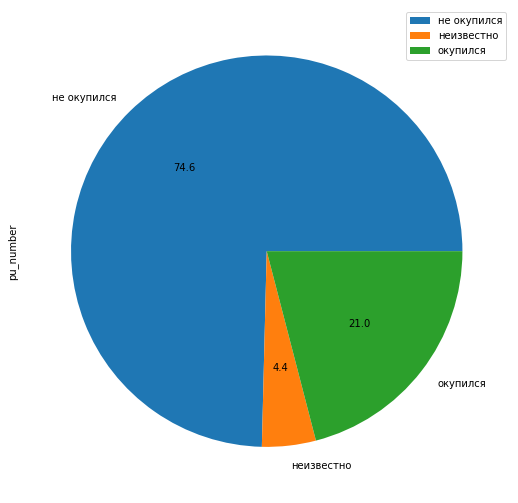

In [48]:
payback_films.plot(y='pu_number', kind='pie', autopct='%.1f', figsize=(9, 9))

Выводы неутешительны: окупилось лишь 66 фильмов, что составляет 21% от общего числа фильмов. У 235 фильмов сумма кассовых сборов меньше бюджета. Окупаемость некоторых фильмов неизвестна. Возможно, они так и не вышли в прокат.

Изучим окупившиеся фильмы. Посмотрим, какой рейтинг у этих фильмов и к каким жанрам они относятся.

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

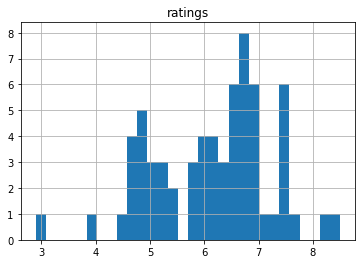

In [49]:
films_with_sup.query('payback == "окупился"').hist('ratings', bins=30)

<AxesSubplot:ylabel='pu_number'>

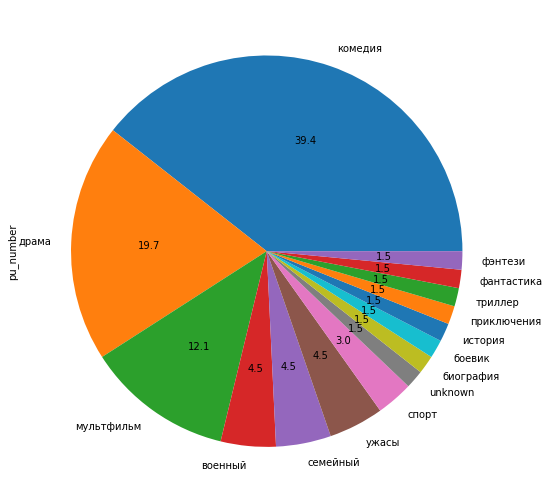

In [50]:
(films_with_sup.query('payback == "окупился"')
     .pivot_table(index='main_genre', values='pu_number', aggfunc='count')
     .sort_values(by='pu_number', ascending=False)
     .plot(y='pu_number', kind='pie', legend=False, autopct='%.1f', figsize=(9, 9))
)

Среди окупившихся есть фильмы с низким рейтингом, но у большинства фильмов рейтинг 6-7. Популярнее остальных оказались комедии (39.4% окупившихся фильмов относятся к этому жанру), наименее популярны фильмы в жанрах "фэнтези", "фантастика", "триллер", "приключения", "история", "боевик" и "биография" (на них приходится по 1.5%).

Проанализируем окупаемость по годам. 

In [51]:
payback_for_year = films_with_sup.pivot_table(index='year', columns='payback', values='pu_number', aggfunc='count')
payback_for_year

payback,не окупился,неизвестно,окупился
year,,,
2013,2.0,NaN,NaN
2014,12.0,NaN,3.0
2015,66.0,1.0,13.0
2016,48.0,1.0,9.0
2017,24.0,2.0,13.0
2018,35.0,NaN,17.0
2019,48.0,10.0,11.0


<AxesSubplot:xlabel='year'>

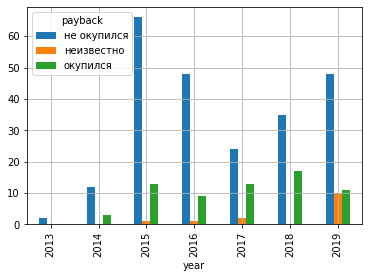

In [52]:
payback_for_year.plot(kind='bar', grid=True)

Наименьшее число окупившихся фильмов было в 2013 году: не окупилось ни одного фильма. Больше всего фильмов окупилось в 2018 году — 17. Наилучшим по отношению окупившихся фильмов к неокупившимся оказался 2017 год, а наихудшим (без учёта 2013 года) — 2016 год.

Перейдём к изучению "топов". Выведем топ-3 самых кассовых и самых дорогих фильмов.

In [53]:
for column in ['box_office', 'budget']:
    display(films_with_sup.sort_values(by=column, ascending=False)[['title', 'show_start_date', 'ratings', 'genres', 'box_office', 'budget']].head(3))

,title,show_start_date,ratings,genres,box_office,budget
309,Холоп,2019-12-19 12:00:00,6.8,комедия,3.073569e+09,160000000.0
194,Движение вверх,2017-12-21 12:00:00,7.5,"спорт,драма",2.779686e+09,590192191.0
245,Т-34,2018-12-21 12:00:00,6.5,"драма,военный,боевик",2.271754e+09,563784717.0


,title,show_start_date,ratings,genres,box_office,budget
290,Тайна Печати Дракона,2019-09-12 12:00:00,5.8,"приключения,фэнтези",3.335971e+08,2.305074e+09
174,Матильда,2017-08-17 12:00:00,7.7,"фэнтези,комедия,семейный",5.117755e+08,1.032906e+09
310,Союз спасения,2019-12-26 12:00:00,6.0,"история,биография,драма",7.177032e+08,9.800000e+08


Самые дорогие и самые кассовые фильмы выходили в 2017-2019 годах, но "в топах" связи между бюджетом, рейтингом, жанром и сборами нет. Например, то, что фильм является самым дорогим или самым кассовым, не значит, что он нравится людям и имеет высокий рейтинг.

Теперь узнаем, сколько средств выделяло государство на поддержку фильмов по годам.

<AxesSubplot:xlabel='year'>

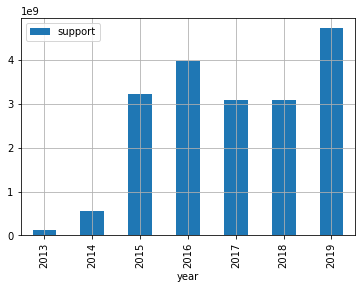

In [54]:
films_with_sup['support'] = films_with_sup['refundable_support'] + films_with_sup['nonrefundable_support']
films_with_sup.pivot_table(index='year', values='support', aggfunc='sum').plot(kind='bar', grid=True)

Больше всего средств на поддержку фильмов государство выделило в 2019 году — 4.7 миллиарда, а меньше всего в 2013 — примерно 100 миллионов. Сильной связи между суммой государственной поддержки и количеством окупившихся в этом году фильмов нет.

Напоследок узнаем, какую долю обычно составляет государственная поддержка от общего бюджета.

array([[<AxesSubplot:title={'center':'support_to_budget'}>]], dtype=object)

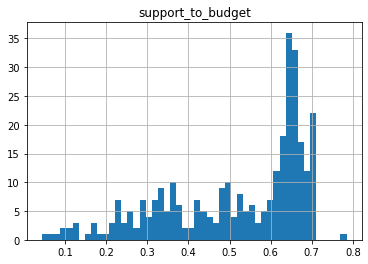

In [55]:
films_with_sup.hist('support_to_budget', bins=50)

Чаще всего государственная поддержка составляет больше половины от общего бюджета, а именно 60-70%.

**Вывод**

В основном, фильмы, получившие государственную поддержку, относятся к жанрам "драма" и "комедия" и имеют рейтинг в районе 6-7. Данные об окумаемости неутешительны: 74.6% фильмов не окупились, хотя у большей части фильмов рейтинг также в диапазоне от 6 до 7. Среди окупившихся фильмов больше всего оказалось комедий, а меньше всего фильмов в жанрах "фэнтези", "фантастика", "триллер", "приключения", "история", "боевик" и "биография".

Сильной связи между суммой государственной поддержки и числом окупившихся фильмов в этом году нет. Меньше всего средств было выделено в 2013 году. Тогда вышло всего 2 фильма и ни один из них не окупился. Больше всего средств было выделено в 2019 году, лучшим по числу окупившихся фильмов был 2018 год, лучшим по отношению окупившихся фильмов к неокупившимся — 2017 год, а лидером по числу вышедших в прокат фильмов оказался 2015 год. 

Также мы выяснили, что чаще всего государственная поддержка составляет 60-70% от общего бюджета фильма.

### Шаг 5. Общий вывод

Итак, мы изучили рынок российского кинопроката и пришли к следующим выводам:
1. Наибольшее число фильмов вышло в прокат в 2010 и 2019 году, а наименьшее — в 2017 и 2012. В данных о прокате в кинотеатрах полнее всего представлен период с 2015 по 2019 год. Причём наибольшая доля фильмов с указанной информацией о прокате в кинотеатрах приходится на 2017 год.
2. С каждым годом, за исключением 2012 и 2019 годов, сумма сборов увеличивается. Минимальная сумма сборов была в 2010 году — всего 2.4 миллиона, а наибольшая в 2018 году — 49 миллиардов. Максимальная средняя и медианная сумма сборов наблюдалась в 2017 году.
3. Возрастное ограничение аудитории влияет на сумму сборов в прокате. Меньше всего собирают фильмы с возрастным ограничением "0+", а больше всего — "16+". Ситуацию может изменить лишь выход культовых фильмов. Так, например, в 2015 году фильмы "12+" оказались самыми кассовыми за счёт выхода в прокат "Звёздных войн", "Мстителей", "Мира Юрского периода" и "Терминатора".

Выводы о фильмах, получивших государственную поддержку, оказались следующими:
1. Чаще всего государством спонсируются фильмы, относящиеся к жанрам "драма" и "комедия", а реже всего — "реальное ТВ", "спорт", "биография" и "криминал".
2. У большинства фильмов рейтинг находится в диапазоне 6-7, но несмотря на это, окупаются они плохо: лишь 21% фильмов окупился. Среди окупившихся больше всего оказалось фильмов в жанре "комедия". Вероятно, эти фильмы интересны относительно узкому кругу зрителей или многие просто не готовы идти на них в кинотеатры.
3. Обычно государственная поддержка составляет 60-70% от общего бюджета фильма, но связи между окупаемостью, количеством фильмов, вышедших за год  и суммой государственной поддержки нет. Также нет связи между бюджетом фильма, сборами и рейтингом.